### Creating a Graph

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G

In [3]:
G.add_node(1)

In [4]:
G

In [6]:
# Add a list of nodes
G.add_nodes_from([2, 3])

or add any iterable container of nodes. You can also add nodes along with node attributes if your container yields 2-tuples (node, node_attribute_dict). Node attributes are discussed further below

In [8]:
H  = nx.path_graph(10)

G.add_nodes_from(H)
G

Note that G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.



In [9]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer.

### Edges

In [10]:
G.add_edge(1, 2)

In [13]:
e = (2, 3)
e

(2, 3)

In [12]:
 G.add_edge(*e)  # unpack edge tuple*

or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., `(2, 3, {'weight': 3.1415}`). Edge attributes are discussed further below

In [14]:
G.add_edges_from(H.edges)

In [17]:
# here are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,
G.clear()

In [18]:
# we add new nodes/edges and NetworkX quietly ignores any that are 
# already present.
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3, 'm')

In [19]:
G.number_of_nodes()

8

In [20]:
G.number_of_edges()

3

We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods .items(), .data('span'). If you want a specific container type instead of a view, you can specify one. Here we use lists, though sets, dicts, tuples and other containers may be better in other contexts.

In [21]:
list(G.nodes)


[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [22]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [23]:
list(G.adj[1]) # List neighbours nodes to 1

[2, 3]

In [24]:
G.degree[1] # Number of edges to 1

2

One can specify to report the edges and degree from a subset of all nodes using an nbunch. An nbunch is any of: None (meaning all nodes), a node, or an iterable container of nodes that is not itself a node in the graph.?????

In [25]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [26]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods

In [28]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [29]:
G.remove_edge(1, 3)


When creating a graph structure by instantiating one of the graph classes you can specify data in several formats

In [30]:
G.add_edge(1, 2)
H = nx.DiGraph(G)
# Di graph is graph with connections in going two ways

In [31]:
list(H.edges())

[(1, 2), (2, 1)]

In [35]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

In [36]:
G[1]

AtlasView({2: {}})

In [37]:
G[1][2]

{}

In [38]:
G.edges[1,2]

{}

In [40]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

Fast examination of all (node, adjacency) pairs is achieved using G.adjacency(), or G.adj.items(). Note that for undirected graphs, adjacency iteration sees each edge twice

In [41]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [43]:
for n, nbrs in FG.adj.items():
    print(n, nbr)

1 3
2 3
3 3
4 3


In [44]:
for nbr, eattr in nbrs.items():
    print(nbr, eattr)

2 {'weight': 1.2}
3 {'weight': 0.375}


In [46]:
for n, nbrs in FG.adj.items():
    print(n, nbr)
    for nbr, eattr in nbrs.items():
        print('---',nbr, eattr)

1 3
--- 2 {'weight': 0.125}
--- 3 {'weight': 0.75}
2 3
--- 1 {'weight': 0.125}
--- 4 {'weight': 1.2}
3 4
--- 1 {'weight': 0.75}
--- 4 {'weight': 0.375}
4 4
--- 2 {'weight': 1.2}
--- 3 {'weight': 0.375}


In [47]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


### Adding Attributes

In [48]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [49]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [50]:
#alternattive add attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]


{'time': '5pm'}

In [51]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to G.nodes does not add it to the graph, use G.add_node() to add new nodes. Similarly for edges.

### Edge Attributes

In [ ]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

### Directed Graphs

The DiGraph class provides additional properties specific to directed edges, e.g., DiGraph.out_edges(), DiGraph.in_degree(), DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() is equivalent to successors() while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

In [52]:
DG = nx.DiGraph()

DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [53]:
DG.degree(1, weight='weight')

1.25

In [54]:
list(DG.successors(1))

[2]

In [55]:
list(DG.neighbors(1))

[2]

In [57]:
H = nx.Graph(G)  # convert G to undirected graph


### Multigraphs

In [59]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [60]:
GG = nx.Graph()

In [61]:
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

In [62]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

### Graph Generators and Graph Operation

![img](Images/Operation1.png)
![img](Images/Operation2.png)


### Analyzing Graphs

In [63]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [64]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [65]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [67]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

### Drawing Graphs

In [68]:
import matplotlib.pyplot as plt

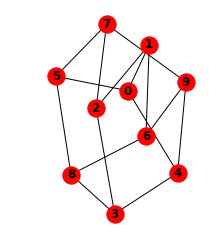

In [69]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')


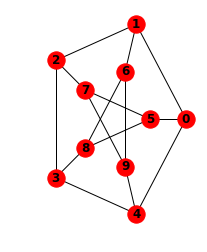

In [70]:
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [71]:
plt.show()

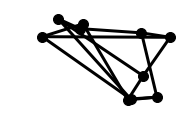

In [73]:
options = {'node_color': 'black','node_size': 100,'width': 3,}
plt.subplot(221)
nx.draw_random(G, **options)

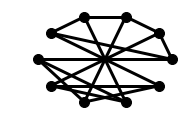

In [74]:
plt.subplot(222)
nx.draw_circular(G, **options)

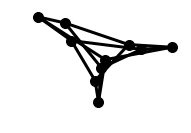

In [75]:
plt.subplot(223)
nx.draw_spectral(G, **options)

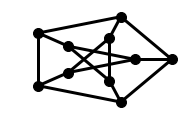

In [77]:
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

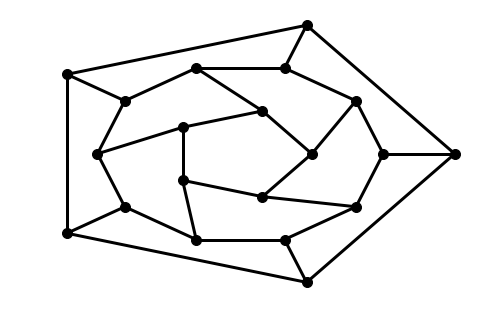

In [78]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

### Saving Graphs

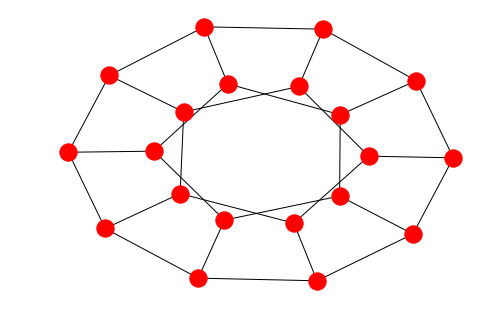

In [79]:
nx.draw(G)
plt.savefig("Images/path.png")

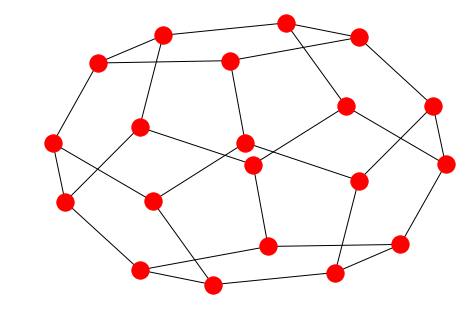

In [83]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'Images/file.dot')